Unsupervised Data Prediction using Machine Learning

In [1]:
# importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
#uploading the data
from google.colab import files
u = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
#converting the data to Dataframe
iris = pd.read_csv("Iris.csv")

In [4]:
#data sample
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica


In [5]:
#data info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#data stats
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_un = iris.drop(["Id", "Species"], axis = 1)
iris_un

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


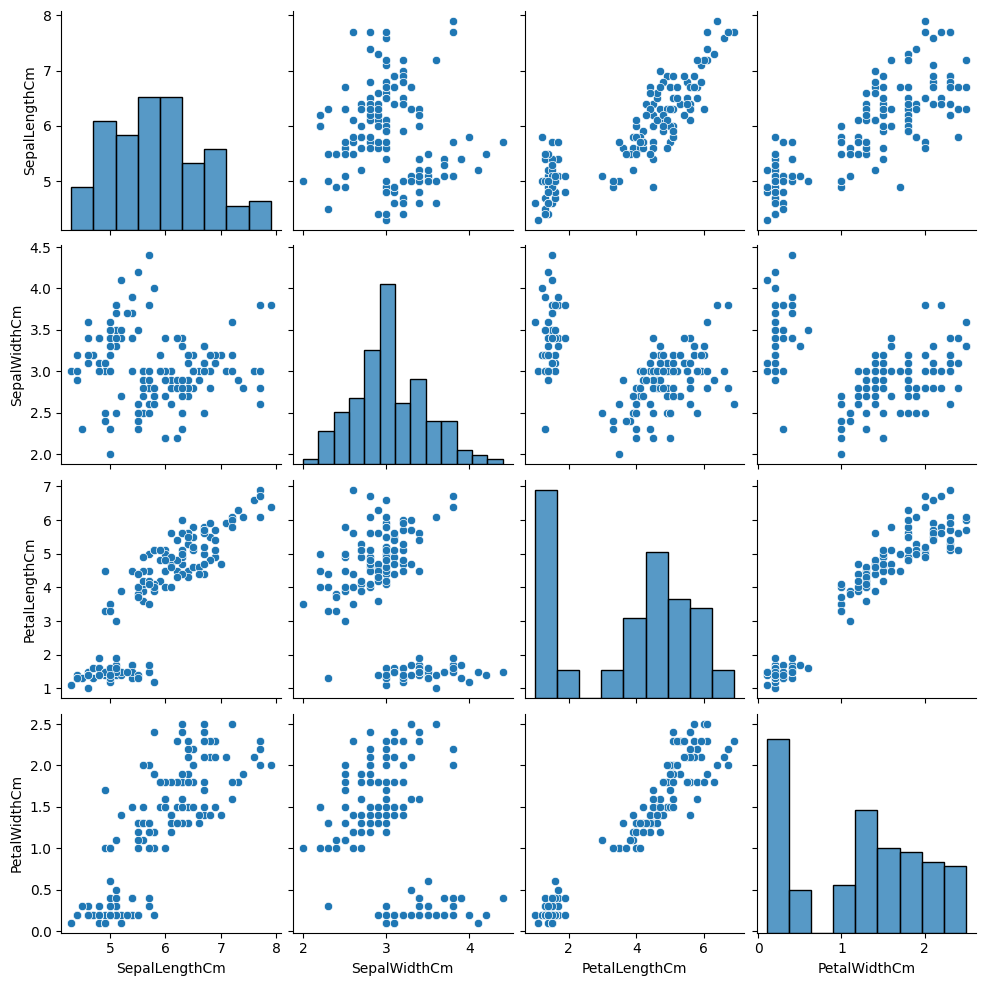

In [8]:
sns.pairplot(iris_un)

Text(0.5, 1.0, 'Correlation Matrix')

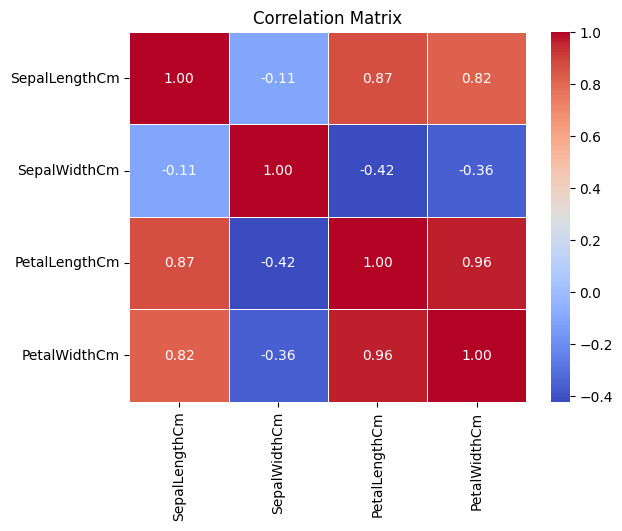

In [9]:
cor = iris_un.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

In [10]:
#Data
X = iris_un
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#scaling each columns
ss = StandardScaler()
scaled = ss.fit_transform(X)

In [12]:
wcss = []
for i in range(1,9):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=350, n_init=10, random_state=10)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)

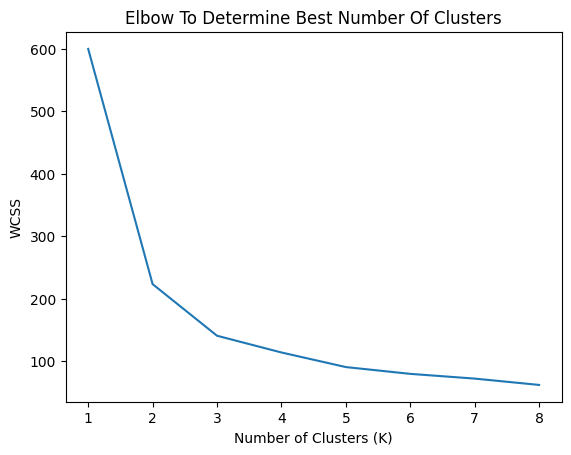

In [13]:
plt.plot(range(1,9), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow To Determine Best Number Of Clusters")
plt.show()

**k = 3 seems the best fit as the elbow point shows at around 3 in the plot above**

In [14]:
# best fit for k = 3 as elbow point is at 3 clusters
opt_k = 3
kmeans = KMeans(n_clusters=opt_k, init="k-means++", max_iter=350, n_init=10, random_state=10)
kmeans.fit(scaled)
clusters_labs = kmeans.labels_

In [15]:
clusters_labs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Text(0.5, 1.0, 'Clustered Data')

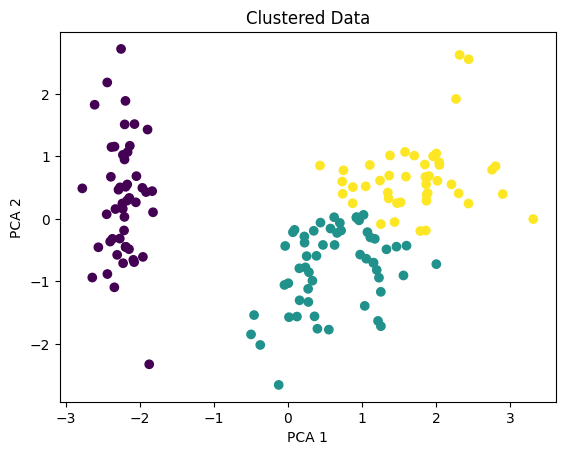

In [16]:
# pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters_labs)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustered Data")

In [17]:
#adding the clusters to original data
iris["cluster"] = clusters_labs
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [18]:
#veryfying with silihoutte score
sil_s = silhouette_score(scaled, clusters_labs)
sil_s

0.46214947389312017

In [19]:
# mapping the value of species column to 0,1,2
un_species = iris.Species.unique()
species_map = {species:index for index, species in enumerate(un_species)}
iris["Species"] = iris["Species"].map(species_map)

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,2
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,2
148,149,6.2,3.4,5.4,2.3,2,2


In [20]:
# checking the count wrongly clustered flowers

wrong_cluster = 0
for i, rows in iris.iterrows():
  if rows["Species"] != rows["cluster"]:
    wrong_cluster += 1

wrong_cluster

28

**28 rows were wrongly clustered making an accuracy of**

In [21]:
#Accuracy
total_points = 150
acc = (total_points-wrong_cluster)/total_points
round(acc,2)

0.81